In [7]:
import pandas as pd
import numpy as np
import plot_params
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from joblib import load

plot_params.apply_rcparams()

In [8]:
X_train = load('X_train.joblib')
y_train = load('y_train.joblib')
X_test = load('X_test.joblib')
y_test = load('y_test.joblib')

In [9]:
logreg_pipeline = Pipeline([
   ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='saga', max_iter=500))
])

logreg_params = {
    'logreg__C': [0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
}

In [10]:
svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', LinearSVC())
])

svc_params = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
}

In [11]:
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=12))
])

rf_params = {
    'rf__n_estimators': [50, 200], 
    'rf__max_depth': [None, 10, 20],
}

In [12]:
grid_search_logreg = GridSearchCV(logreg_pipeline, logreg_params, cv=5, 
                                  scoring='f1_macro', n_jobs=-1, verbose=1)
grid_search_logreg.fit(X_train, y_train)
print("Best Logistic Regression Parameters:", grid_search_logreg.best_params_)
print("Best Logistic Regression Accuracy:", grid_search_logreg.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Logistic Regression Parameters: {'logreg__C': 100, 'logreg__penalty': 'l1'}
Best Logistic Regression Accuracy: 0.9690516464185217


C:\Users\frang\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [13]:
grid_search_svc = GridSearchCV(svc_pipeline, svc_params, cv=5, 
                               scoring='f1_macro', n_jobs=-1, verbose=1)
grid_search_svc.fit(X_train, y_train)
print("Best SVC Parameters:", grid_search_svc.best_params_)
print("Best SVC Accuracy:", grid_search_svc.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best SVC Parameters: {'svc__C': 10}
Best SVC Accuracy: 0.9682462508211838


In [14]:
grid_search_rf = GridSearchCV(rf_pipeline, rf_params, cv=5, 
                              scoring='f1_macro', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)
print("Best Random Forest Parameters:", grid_search_rf.best_params_)
print("Best Random Forest Accuracy:", grid_search_rf.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Random Forest Parameters: {'rf__max_depth': None, 'rf__n_estimators': 200}
Best Random Forest Accuracy: 0.9998373278480018


In [15]:
best_logreg = grid_search_logreg.best_estimator_ 
y_pred_logreg = best_logreg.predict(X_test)
print("\nLogistic Regression Test Performance:")
print(classification_report(y_test, y_pred_logreg))
print("Test Accuracy:", accuracy_score(y_test, y_pred_logreg))


Logistic Regression Test Performance:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.92      0.17        98

    accuracy                           0.98     56962
   macro avg       0.55      0.95      0.58     56962
weighted avg       1.00      0.98      0.99     56962

Test Accuracy: 0.9849373266388118


In [16]:
best_svc = grid_search_svc.best_estimator_
y_pred_svc = best_svc.predict(X_test)
print("\nSVC Test Performance:")
print(classification_report(y_test, y_pred_svc))
print("Test Accuracy:", accuracy_score(y_test, y_pred_svc))


SVC Test Performance:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.92      0.19        98

    accuracy                           0.99     56962
   macro avg       0.55      0.95      0.59     56962
weighted avg       1.00      0.99      0.99     56962

Test Accuracy: 0.9866226607211825


In [17]:
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("\nRandom Forest Test Performance:")
print(classification_report(y_test, y_pred_rf))
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Test Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.85      0.83        98

    accuracy                           1.00     56962
   macro avg       0.91      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Test Accuracy: 0.999420666409185


In [18]:
y_score_logreg = best_logreg.decision_function(X_test) 
precision_logreg, recall_logreg, _ = \
    precision_recall_curve(y_test, y_score_logreg)
auc_logreg = auc(recall_logreg, precision_logreg)
avg_prec_logreg = average_precision_score(y_test, y_score_logreg)

In [19]:
y_score_svc = best_svc.decision_function(X_test)  
precision_svc, recall_svc, _ = \
    precision_recall_curve(y_test, y_score_svc)
auc_svc = auc(recall_svc, precision_svc)
avg_prec_svc = average_precision_score(y_test, y_score_svc)

In [20]:
y_score_rf = best_rf.predict_proba(X_test)[:, 1]
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_score_rf)
auc_rf = auc(recall_rf, precision_rf)
avg_prec_rf = average_precision_score(y_test, y_score_rf)

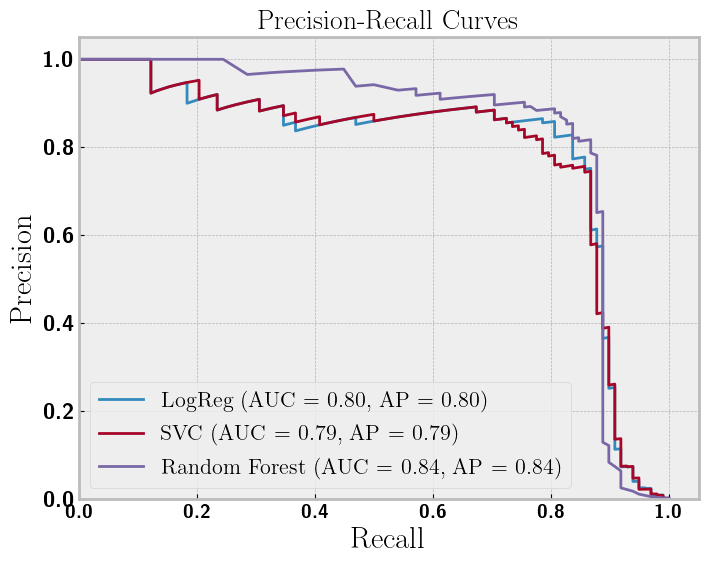

In [31]:
plt.figure(figsize=(8, 6))

plt.plot(recall_logreg, precision_logreg, 
         label=f'LogReg (AUC = {auc_logreg:.2f}, AP = {avg_prec_logreg:.2f})')
plt.plot(recall_svc, precision_svc, 
         label=f'SVC (AUC = {auc_svc:.2f}, AP = {avg_prec_svc:.2f})')
plt.plot(recall_rf, precision_rf, 
         label=f'Random Forest (AUC = {auc_rf:.2f}, AP = {avg_prec_rf:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='lower left')
plt.grid(True)
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.savefig("images/auc.jpg")